# Introduction

Our report utilizes data from the Vancouver Police Department to study crime report trends across different neighborhoods in Vancouver [2]. This study has the potential to assist the police in identifying areas with a higher probability of criminal activity, enabling them to strategically distribute and allocate their human resources for maximum effectiveness. To achieve this, we included all available years of crime data to enhance the accuracy of our estimations, recognizing the importance of optimizing human resource utilization to potentially minimize crime levels.

The rationale behind selecting data from all years is to leverage historical data effectively for estimating proportions. Considering data from multiple years provides a broader perspective on crime patterns, allowing us to identify long-term trends and potential seasonality [3]. This approach leads to more accurate estimations compared to relying solely on data from a single year, which could be influenced by external factors such as the pandemic.

To substantiate our observations, we conduct hypothesis tests to compare crime proportions in Mount Pleasant and Strathcona. We analyze "theft from vehicle" and "offence against a person" [4]. We aim to see if Mount Pleasant's higher crime rate is due to more "theft from vehicle" incidents. The null hypothesis assumes no difference, while the alternative suggests a difference favoring Mount Pleasant.

Similarly, we test if "offence against a person" contribute to Strathcona's higher crime rate. The null hypothesis assumes equal proportions, while the alternative suggests Strathcona's proportion is higher. This approach helps uncover reasons behind crime rate variations.

![image](https://gifdb.com/images/high/guilty-cop-looking-for-a-committed-crime-a77ia3islo986774.webp)

The dataset contains multiple variables however we will only use the columns TYPE, YEAR and NEIGHBOURHOOD. 

The column TYPE contains different categories of crimes repoted such as Theft from Vehicle,Homicide,Mischief,Offence Against a Person. 

The column YEAR contains the data from all the years from 2003 to 2022. 

The column NEIGHBOURHOOD contain different areas of vanouver for which the data is recorded such as West End, Strathcona, Mount Pleasant,Fairview. 
           
           
Based on our hypothesis testing, the variables we are mainly focusing on would be "Theft from vehicle" and "Offence against person" in column "TYPE", all years in cloumn "YEAR", and "Mount Pleasant" and "Strathcona" in column "NEIGHBOURHOOD".

# Method

#### Based on this, we want to know: 

* Is the crime type of "Theft from a vehicle" greater in Mount Pleasant than Strathcona?

H<sub>0</sub>: Theft From Vehicle in Mount Pleasant = Strathcona

H<sub>1</sub>: Theft From Vehicle in Mount Pleasant > Strathcona

* Is the crime type of "Offence against a person" greater in Strathcona than Mount Pleasant ?

H<sub>0</sub>: Offence against a person in Mount Pleasant = Strathcona

H<sub>1</sub>: Offence against a person in Mount Pleasant < Strathcona



### Importing Libraries

In [1]:
# Importing some necessary libraries

library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




- As we move ahead in our model, we will be making some calculations that require special seed to be replicated. For these purposes, we will use set.seed(1) wherever applicable so results can be easily tested elsewhere.

### Reading the Data

Reading crime dataset from github link and performing some cleaning to make the data more readable by using mutate(), as_factor() and drop_na() functions.

In [2]:
crime_data <- read_csv("https://raw.githubusercontent.com/vkyaang/Stat201-project/main/crimedata_csv_AllNeighbourhoods_AllYears.csv") %>%
    mutate(TYPE = as_factor(TYPE),
          NEIGHBOURHOOD = as_factor(NEIGHBOURHOOD)) %>%
    drop_na()
head(crime_data)

Rows: 868146 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


*Table 1: The crime dataset*

### Data Summary 

Calculating the relevant summaries and finding the point estimates

In [3]:
# select crime_data with only chosen neighborhood and type
crime_data_clean <- crime_data %>%  
                    select(TYPE, NEIGHBOURHOOD) %>%
                    group_by(TYPE)

crime_data_total <- crime_data_clean %>%
    summarise(total = n())
    

# Separating the two neighbourhood to get a data summary
# Dataframe for Mount Pleasant
mount_pleasant_n <- crime_data_clean %>%  
    filter(NEIGHBOURHOOD == 'Mount Pleasant') %>%
    summarise(MountPleasent = n())

# Dataframe for Strathcona
strathcona_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Strathcona') %>%
    summarise(Strathcona = n())

# Combining the datasets and finding proportion and other relevant data, presented in a form of a table
crime_data_sum <- crime_data_total %>%
    inner_join(mount_pleasant_n, by = 'TYPE') %>%
    inner_join(strathcona_n, by = 'TYPE') %>%
    mutate(MountPleasent_prop = MountPleasent/sum(total)) %>%
    mutate(strathcona_prop = Strathcona/sum(total)) %>%
    mutate(prop_diff = MountPleasent_prop - strathcona_prop)

In [4]:
head(crime_data_clean)

TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona


*Table2 : Clean data with only relevant data*

In [5]:
head(crime_data_total)

TYPE,total
<fct>,<int>
Theft from Vehicle,240856
Theft of Bicycle,36930
Theft of Vehicle,44710
Vehicle Collision or Pedestrian Struck (with Fatality),347
Vehicle Collision or Pedestrian Struck (with Injury),28839
Break and Enter Commercial,47310


*Table 3: Sum total of all crimes*

In [6]:
crime_data_sum

TYPE,total,MountPleasent,Strathcona,MountPleasent_prop,strathcona_prop,prop_diff
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,240856,13345,13161,1.537457e-02,1.516258e-02,0.0002119835
Theft of Bicycle,36930,3955,1692,4.556494e-03,1.949327e-03,0.0026071669
Theft of Vehicle,44710,3118,2250,3.592199e-03,2.592190e-03,0.0010000092
Vehicle Collision or Pedestrian Struck (with Fatality),347,21,34,2.419377e-05,3.917087e-05,-0.0000149771
Vehicle Collision or Pedestrian Struck (with Injury),28839,2124,1559,2.447027e-03,1.796100e-03,0.0006509277
Break and Enter Commercial,47310,4122,3146,4.748892e-03,3.624457e-03,0.0011244343
Break and Enter Residential/Other,72174,3872,2681,4.460871e-03,3.088738e-03,0.0013721325
Homicide,309,19,32,2.188960e-05,3.686670e-05,-0.0000149771
Mischief,105195,6102,8142,7.030019e-03,9.380271e-03,-0.0023502521


*Table 4: Proportions of different crimes*

In [7]:
summary(crime_data_clean)

                                TYPE                          NEIGHBOURHOOD   
 Theft from Vehicle               :240856   Central Business District:233260  
 Other Theft                      :215709   West End                 : 78052  
 Mischief                         :105195   Strathcona               : 55744  
 Offence Against a Person         : 75613   Mount Pleasant           : 54681  
 Break and Enter Residential/Other: 72174   Fairview                 : 53340  
 Break and Enter Commercial       : 47310   Grandview-Woodland       : 48805  
 (Other)                          :111135   (Other)                  :344110  

*Table 5: Dataset Summary*

### Reasons for selecting the variables

- Mount Pleasant and Strathacona contain similar and comparable number of datapoints (rows) in the dataset which can help us to balance the data as no variable will have a significant advantage or bias

- As we can observe from raw data which is also visualized further ahead, Theft from a vehicle can be inferred to be one of the largest contributor in Mount Pleasant whereas Offence agaisnt a person is one of the largest in Strathcona. These points allign with our null and alternative hypothesis. 

These reasons are sufficient for us to move forward with our model

In [8]:
# Getting the number of different crime type rate in the two neighbourhoods

#Mount Pleasant
dataMP <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Mount Pleasant") |>
            group_by(TYPE) |>
            summarize(n= n())
#Strathcona
dataS <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Strathcona") |>
            group_by(TYPE) |>
            summarize(n= n())

In [9]:
dataMP

TYPE,n
<fct>,<int>
Theft from Vehicle,13345
Theft of Bicycle,3955
Theft of Vehicle,3118
Vehicle Collision or Pedestrian Struck (with Fatality),21
Vehicle Collision or Pedestrian Struck (with Injury),2124
Break and Enter Commercial,4122
Break and Enter Residential/Other,3872
Homicide,19
Mischief,6102


*Table 6: Number of crimes reported in Mount Pleasant*

In [10]:
dataS

TYPE,n
<fct>,<int>
Theft from Vehicle,13161
Theft of Bicycle,1692
Theft of Vehicle,2250
Vehicle Collision or Pedestrian Struck (with Fatality),34
Vehicle Collision or Pedestrian Struck (with Injury),1559
Break and Enter Commercial,3146
Break and Enter Residential/Other,2681
Homicide,32
Mischief,8142


*Table 7: Number of crimes reported in Strathcona*

In [11]:
# Calculating the total crime reported
neighbor_total <- crime_data %>%
    select(NEIGHBOURHOOD) %>%
    summarise(n = n()) %>%
    pull()

# Finding the crime rate proportion in Mount Pleasant using the total crime rate and Mount Pleasant crime rate
dataMP_prop <- dataMP |>
     summarize(total_number_of_crime= sum(n)) |>
     mutate(location = 'Mount Pleasant') |>
     mutate(prop = total_number_of_crime/neighbor_total) 


# Finding the crime rate proportion in Strathcona using the total crime rate and Strathcona crime rate
dataS_prop <- dataS |>
      summarize(total_number_of_crime= sum(n))  |>
      mutate(location = 'Strathcona') |>
      mutate(prop = total_number_of_crime/neighbor_total)

In [12]:
# Combining the two crime rates to get a summary of the proportions
proportion <- rbind(dataS_prop, dataMP_prop) 

In [13]:
proportion

total_number_of_crime,location,prop
<int>,<chr>,<dbl>
55744,Strathcona,0.06422179
54681,Mount Pleasant,0.06299712


*Table 8: Crimes rates of two neighboorhoods*

### Visualization 

Plotting all the summarized data and comparing the crime rates 

In [15]:
# Plotting the crime rates to visualize the proportion difference between Mount Pleasant and Strathcona
options(repr.plot.width = 6, repr.plot.height = 5)
prop_plot <- proportion %>%
    ggplot(aes(x=location, y=prop)) +
    geom_bar(stat = 'identity') +
    labs(y='Neighborhood', x='Proportion') +
    ggtitle('Proportion of All Crimes for Mount Pleasant and Strathcona ') +
    theme(axis.text.x = element_text(size=15))

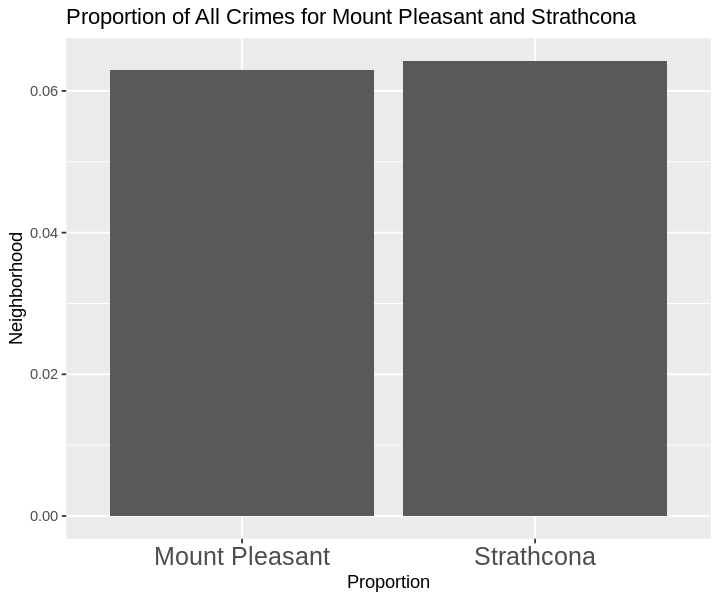

In [16]:
prop_plot

*Plot 1: Crime rates plot*


Note that the proportions of crime rates in Mount Pleasant and Strathcona are closely aligned. Consequently, our comparison between these proportions is more robust, benefiting from the similarity between these two neighborhoods.

In [17]:
# Plotting Proportions of different types of crimes in Mount Pleasant
options(repr.plot.width = 12, repr.plot.height = 10)
mountpleasant_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y= MountPleasent_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Mount Pleasant)', x='Type of Crimes') +
    ggtitle('Mount Pleasant Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))

# Plotting Proportions of different types of crimes in Strathacona
options(repr.plot.width = 15, repr.plot.height = 10)
strathcona_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y=strathcona_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Strathcona)', x='Type of Crimes') +
    ggtitle('Strathconat Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))

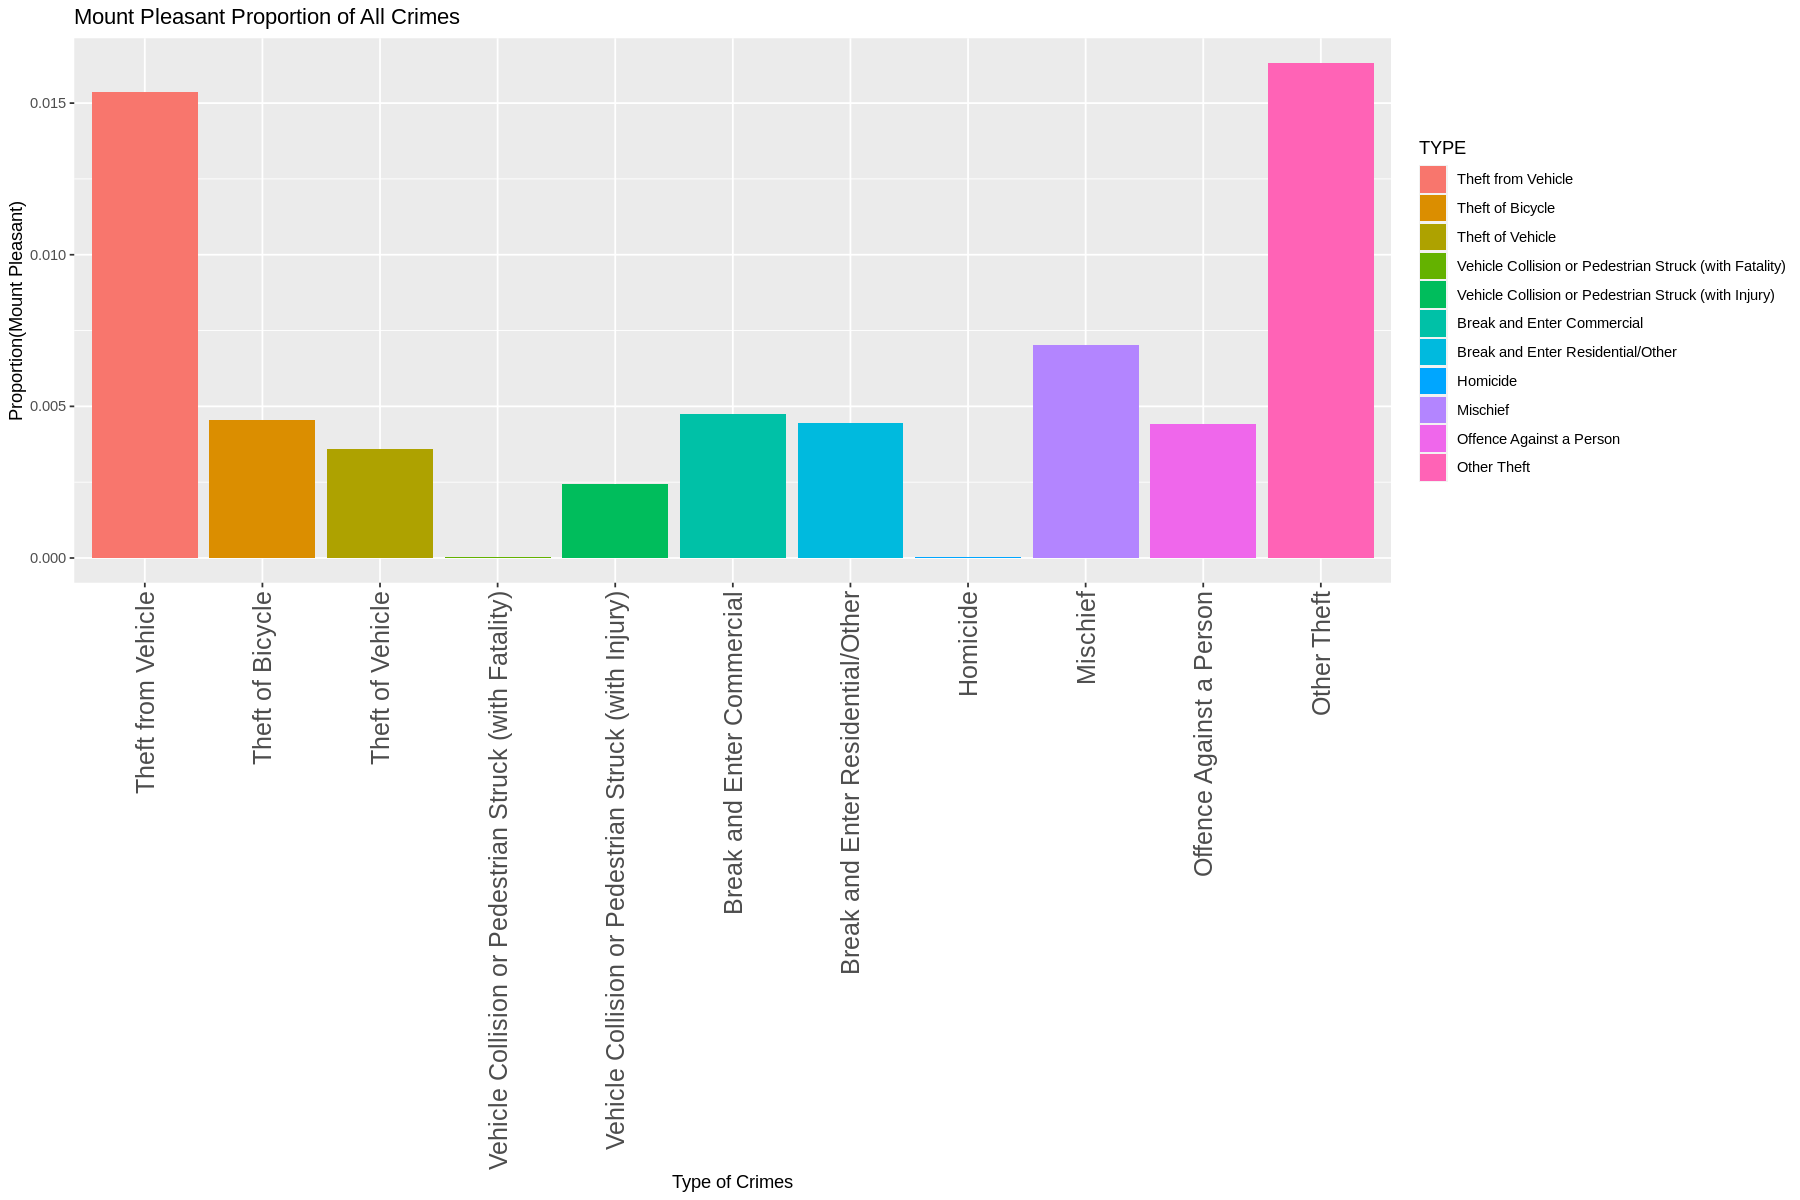

In [18]:
mountpleasant_sum_plot

*Plot 2: Different Type of crimes in Mount Pleasant*

In [ ]:
strathcona_sum_plot

*Plot 3: Different Type of crimes in Strathcona*

In [19]:
# Plotting the graphs together to better compare the different crime rates
options(repr.plot.width = 13, repr.plot.height = 8)

mp_prop <- crime_data_sum %>%
    select(MountPleasent_prop, TYPE) %>%
    mutate(neighborhood = 'Mount Pleasant', 
          prop = MountPleasent_prop) %>%
    select(-MountPleasent_prop)

s_prop <- crime_data_sum %>%
    select(strathcona_prop, TYPE) %>%
    mutate(neighborhood = 'Strathconat', 
          prop = strathcona_prop)  %>%
    select(-strathcona_prop)

    
all_prop <- rbind(mp_prop, s_prop)

combined_prop_plot <- all_prop %>%
    ggplot(aes(x=TYPE, y=prop, fill = neighborhood)) +
    geom_bar(stat = 'identity', position = "dodge") +
    labs(y='Proportion', x='Type of Crimes', legend= 'Neighborhood') +
    ggtitle('Strathconat and Mount Pleasant Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15)) +
    coord_flip()

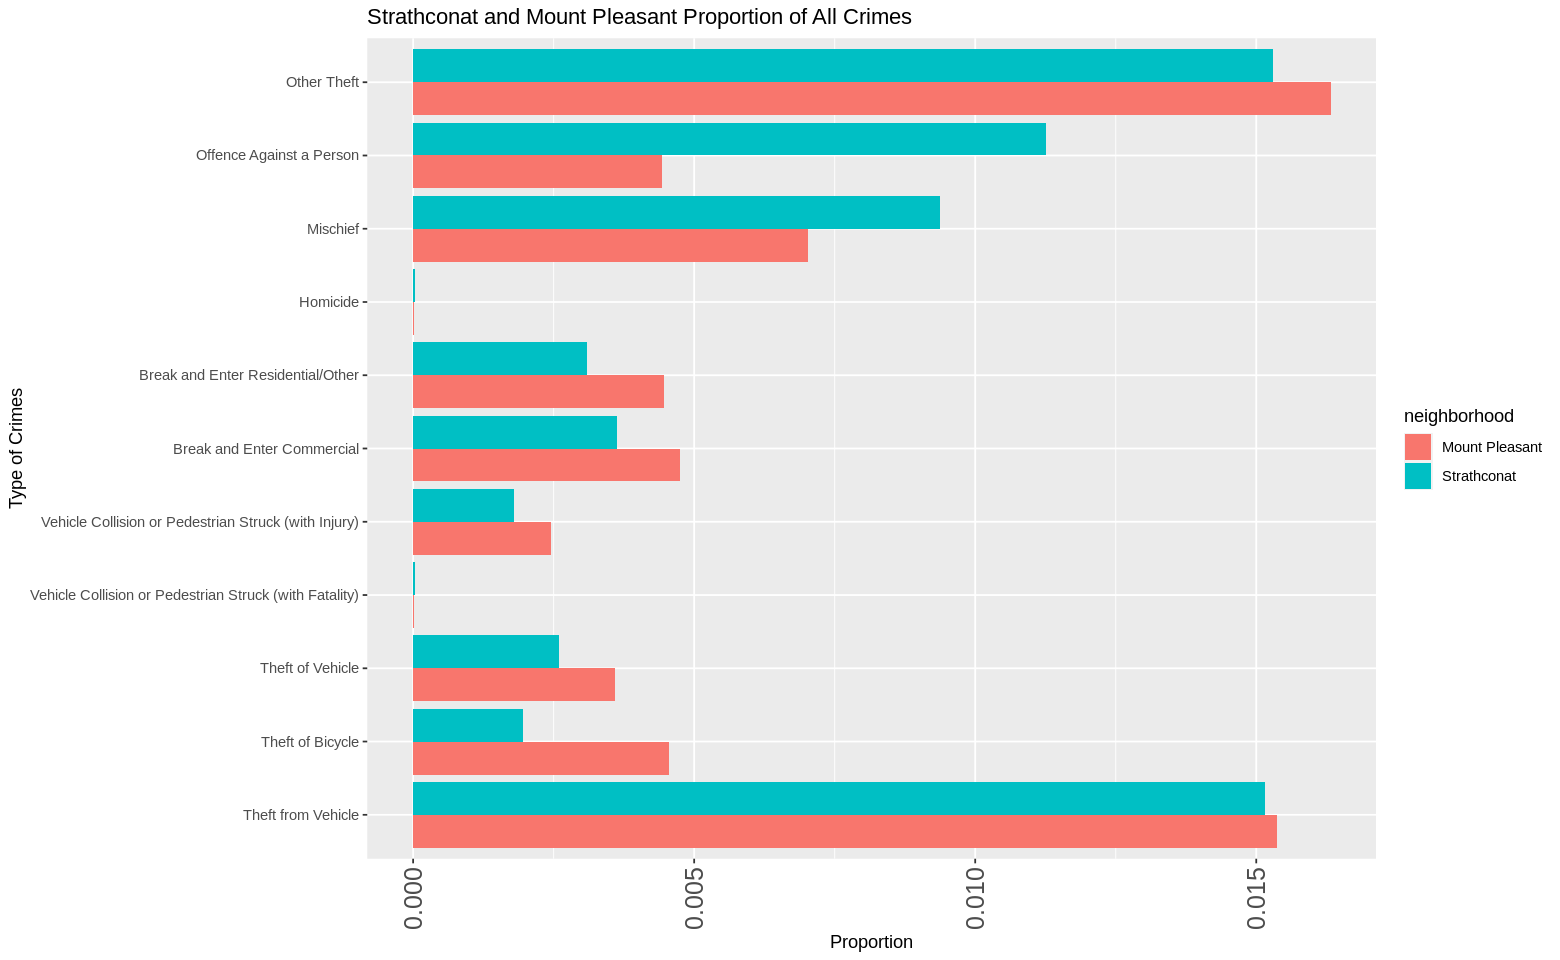

In [20]:
combined_prop_plot

*Plot 4: Comparing the crime rates*

### Statistical Model

Analyzing the data using multiple tests as described below

- Before we start our analysis, it is important to mention that we will be setting the significant value to be 0.05. This is most widely accepted value and serve as a standard threshold for statistical significance. It's also more balanced so that we don't accpet too many false positive error causing type 1 error, but also able to detect any meaning error. 
- We are also going to set a confidence interval level of 95% which will help us get a more accurate data but also obtain a reasonable width that contains the true parameter.


We will be performing inference models using various statistical methods. 

First we will summarize the data and obtain more information about our sample. Then we will create the bootstrap samples to caclulate its confidence intervals. We will also find the standard error for the two sets before moving on to the actual analysis. The hypothesis tests involves using bootstrapping and asymptotic permutation test.

We will first find the observed difference 

In [21]:
# To better work with our desired data, we are filtering only two neighbourhoods and two crime types

# NEIGHBOURHOOD 1: Strathcona
# NEIGHBOURHOOD 2: Mount Pleasant

# CRIME TYPE 1: Theft from Vehicle
# CRIME TYPE 2: Offence Against a Person


crime_new <- crime_data %>% 
    select(TYPE, NEIGHBOURHOOD) #Selecting relevant columns

n <- nrow(crime_new)

crime_mp_s <- crime_new %>%
    filter(TYPE == "Theft from Vehicle" | TYPE == "Offence Against a Person") %>% #Filtering the crime type
    filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD =="Mount Pleasant") %>% #Filtering the neighbourhood
    group_by(TYPE)

crime_theft <- crime_new %>%  #printing only theft from vehicle crime type
    filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD == "Mount Pleasant") %>%
    mutate(is_theft = TYPE == "Theft from Vehicle")


crime_offence <- crime_new %>%  #printing only offence against a person crime type
    filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD == "Mount Pleasant") %>%
    mutate(is_theft = TYPE == "Offence Against a Person")


In [22]:
tail(crime_mp_s)

TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona


*Table 9: Crime theft data filtered*

In [ ]:
tail(crime_theft)

*Table 10: Theft from vehicle type for the two neighbourhoods*

In [ ]:
# Number of rows in the above data
n

In [23]:
# Printing the number of crimes commited in each neighbourhood for theft from a vehicle type

crime_is_theft_sum <- crime_data %>%  
        select(TYPE, NEIGHBOURHOOD) %>%
        filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD =="Mount Pleasant") %>%
        mutate(is_theft = TYPE == "Theft from Vehicle") %>%
        group_by(NEIGHBOURHOOD) %>%
        count(is_theft) %>%
        mutate(prop = n/sum(n))

crime_is_theft_sum

NEIGHBOURHOOD,is_theft,n,prop
<fct>,<lgl>,<int>,<dbl>
Strathcona,FALSE,42583,0.7639028
Strathcona,TRUE,13161,0.2360972
Mount Pleasant,FALSE,41336,0.7559481
Mount Pleasant,TRUE,13345,0.2440519


*Table 11: Number of rows with crime commited (Theft from Vehicle)*

In [24]:
# Printing the number of crimes commited in each neighbourhood for offence against a person type

crime_is_o_sum <- crime_data %>%  
        select(TYPE, NEIGHBOURHOOD) %>%
        filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD =="Mount Pleasant") %>%
        mutate(is_offence = TYPE == "Offence Against a Person") %>%
        group_by(NEIGHBOURHOOD) %>%
        count(is_offence) %>%
        mutate(prop = n/sum(n))

crime_is_o_sum

NEIGHBOURHOOD,is_offence,n,prop
<fct>,<lgl>,<int>,<dbl>
Strathcona,FALSE,45975,0.82475244
Strathcona,TRUE,9769,0.17524756
Mount Pleasant,FALSE,50845,0.92984766
Mount Pleasant,TRUE,3836,0.07015234


*Table 12: Number of rows with crime commited (Offence Against a Person)*

By assigning 'true' or 'false' labels to extract the desired crime type's proportion in the specific neighborhood, we can estimate the proportion and subsequently compare it with the final value. This comparison allows us to test whether our initial expectation aligns with the actual result.

In [25]:
# grouping the sample by locations and generate bootstrap samples
set.seed(1)
mount_pleasant <- crime_data %>%  
    select(TYPE, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD == 'Mount Pleasant')

strathcona <- crime_data %>%  
    select(TYPE, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD == 'Strathcona')

mount_pleasant_sample <- mount_pleasant %>%
    rep_sample_n(size = nrow(mount_pleasant), reps = 50, replace = TRUE) %>%
    group_by(replicate)

strathcona_sample <- strathcona %>%
    rep_sample_n(size = nrow(strathcona), reps = 50, replace = TRUE) %>%
    group_by(replicate)

head(mount_pleasant_sample)

replicate,TYPE,NEIGHBOURHOOD
<int>,<fct>,<fct>
1,Break and Enter Commercial,Mount Pleasant
1,Other Theft,Mount Pleasant
1,Theft from Vehicle,Mount Pleasant
1,Theft from Vehicle,Mount Pleasant
1,Break and Enter Commercial,Mount Pleasant
1,Mischief,Mount Pleasant


*Table 13: Grouped data for Mount Pleasant*

In [ ]:
head(strathcona_sample)

*Table 14: Grouped data for Strathcona*

In [46]:
set.seed(1)


# Finding the confidence intervals for the two neighbourhoods for theft from vehicle and offence against a person
mount_pleasant_sample_prop <- mount_pleasant_sample %>%
    summarise(prop = sum(TYPE == "Theft from Vehicle")/nrow(mount_pleasant_sample))

strathcona_sample_prop <- strathcona_sample %>%
    summarise(prop = sum(TYPE == "Theft from Vehicle")/nrow(strathcona_sample))

mount_pleasant_ci <- mount_pleasant_sample_prop %>%
    get_ci(level = 0.95, type = "percentile")   # setting the level of Confidence interval to 95%

strathcona_ci <- strathcona_sample_prop %>%
    get_ci(level = 0.95, type = "percentile")   # setting the level of Confidence interval to 95%



mount_pleasant_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.004833955,0.004931622


*Table 15: Confidence interval for Mount Pleasant*

In [47]:
strathcona_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.004663982,0.004784667


*Table 16: Confidence interval for Strathcona*

In [48]:
set.seed(1)

# Finding the observed difference in the proportion for the two types of crimes to confirm our sample dataset
obs_diff_prop_theft <- crime_mp_s %>% 
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Theft from Vehicle") %>%
    hypothesise(null = 'independence') %>%
    summarise(stat = (sum(TYPE == "Theft from Vehicle" & NEIGHBOURHOOD == "Mount Pleasant") / proportion$total_number_of_crime[2])
                 - (sum((TYPE == "Theft from Vehicle" & NEIGHBOURHOOD == "Strathcona") / proportion$total_number_of_crime[1])))  %>%
    mutate(stat = stat + (0 - mean(stat)))

obs_diff_prop_offence <- crime_mp_s %>% 
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    hypothesise(null = 'independence') %>%
    summarise(stat = (sum(TYPE == "Offence Against a Person" & NEIGHBOURHOOD == "Strathcona") / proportion$total_number_of_crime[2])
                 - (sum((TYPE == "Offence Against a Person" & NEIGHBOURHOOD == "Mount Pleasant") / proportion$total_number_of_crime[1])))  %>%
    mutate(stat = stat + (0 - mean(stat)))


obs_diff_prop_theft

Dropping unused factor levels c("Theft of Bicycle", "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", "Vehicle Collision or Pedestrian Struck (with Injury)", "Break and Enter Commercial", "Break and Enter Residential/Other", "Homicide", "Mischief", "Other Theft") from the supplied response variable 'TYPE'.

Dropping unused factor levels c("Sunset", "Kensington-Cedar Cottage", "Central Business District", "Fairview", "Grandview-Woodland", "West End", "Hastings-Sunrise", "Shaughnessy", "Kitsilano", "Marpole", "Stanley Park", "Oakridge", "Riley Park", "West Point Grey", "Victoria-Fraserview", "Kerrisdale", "Arbutus Ridge", "Renfrew-Collingwood", "Musqueam", "Killarney", "Dunbar-Southlands", "South Cambie") from the supplied explanatory variable 'NEIGHBOURHOOD'.

Dropping unused factor levels c("Theft of Bicycle", "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", "Vehicle Collision or Pedestrian Struck (with Injury)", "Break and Enter

stat
<dbl>
0


*Table 17: Observed difference in Proportion for theft from a vehicle*

In [49]:
obs_diff_prop_offence

stat
<dbl>
0


*Table 18: Observed difference in Proportion for offence against a person*

Since our observed differences are 0, this validates our values from the dataset and confirms that the data we are selecting matches the dataset

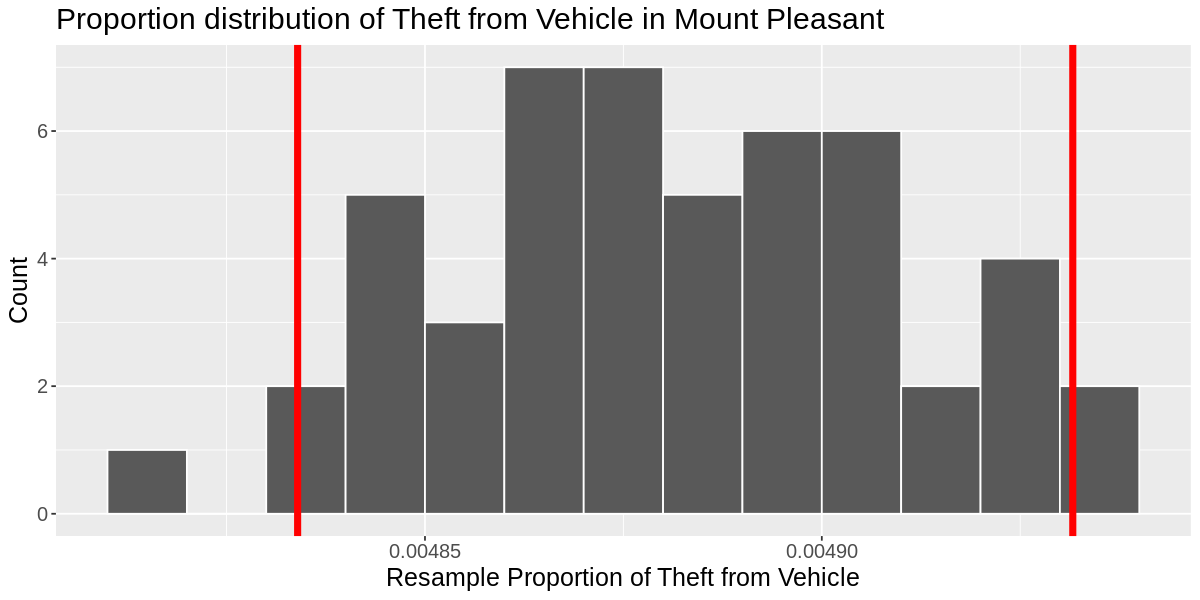

In [50]:
set.seed(1)

# Plotting the proportion distribution for the theft from vehicle in the two neighbourhoods
options(repr.plot.width = 10, repr.plot.height = 5)
mount_pleasant_sample_prop_plot <- mount_pleasant_sample_prop %>%
      ggplot(aes(x = prop)) +
      geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
      ggtitle("Proportion distribution of Theft from Vehicle in Mount Pleasant") +
      geom_vline(xintercept = mount_pleasant_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = mount_pleasant_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
      labs(x = "Resample Proportion of Theft from Vehicle", y="Count")

strathcona_sample_prop_plot <- strathcona_sample_prop %>%
    ggplot(aes(x = prop)) +
  geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
    ggtitle("Proportion distribution of Theft from Vehicle in Strathcona") +
      geom_vline(xintercept = strathcona_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = strathcona_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
  labs(x = "Resample Proportion of Theft from Vehicle", y="Count")


mount_pleasant_sample_prop_plot

*Plot 5: Proportion distribution of Theft from Vehicle in Mount Pleasant*

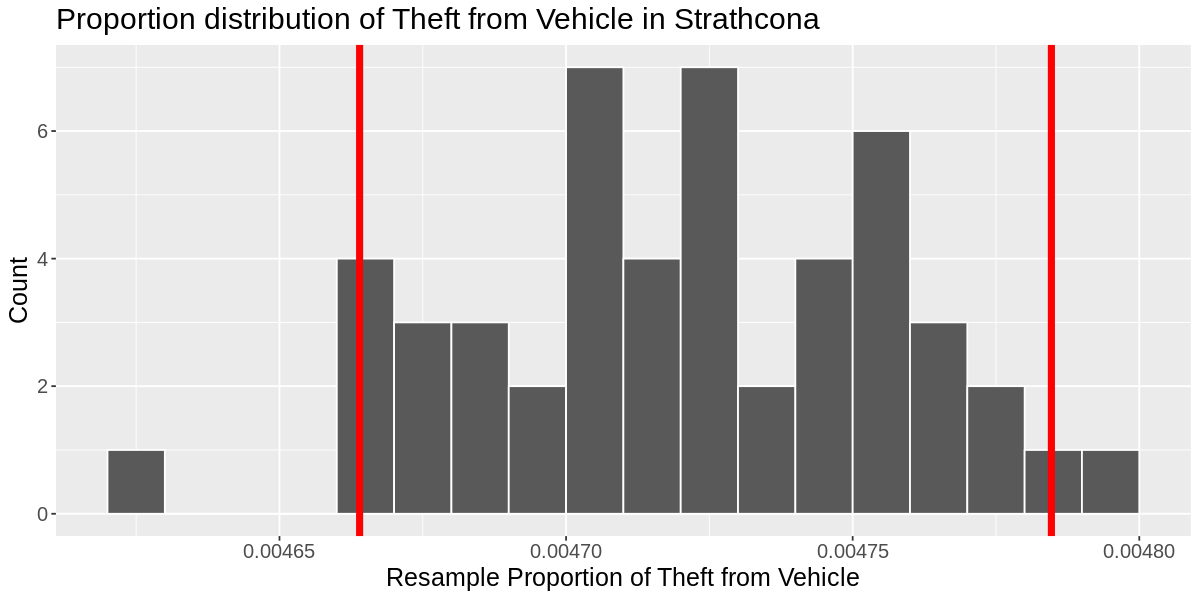

In [51]:
strathcona_sample_prop_plot

*Plot 6: Proportion distribution of Theft from Vehicle in Strathcona*

In [52]:
set.seed(1)

#Finding the standard error for the two neighbourhoods
mount_pleasant_sd <- mount_pleasant_sample_prop %>%
    summarize(SE = sd(prop))

strathcona_sd <- strathcona_sample_prop %>%
    summarize(SE = sd(prop))


mount_pleasant_sd

SE
<dbl>
2.816129e-05


*Table 19: Standard error in Mount Pleasant*

In [36]:
strathcona_sd

SE
<dbl>
3.675799e-05


*Table 20: Standard error in Strathcona*

Obtaining a relatively small standard error is beneficial as it indicates that our sample statistics are fairly close to the true population parameter with low variability. This, in turn, leads to a statistically significant result.

In [58]:
# Finding the confidence intervals for the two neighbourhoods for offence against a person
set.seed(1)
mount_pleasant_sample_offence_prop <- mount_pleasant_sample %>%
    summarise(prop = sum(TYPE == "Offence Against a Person")/nrow(mount_pleasant_sample))

strathcona_sample_offence_prop <- strathcona_sample %>%
    summarise(prop = sum(TYPE == "Offence Against a Person")/nrow(strathcona_sample))


mount_pleasant_offence_ci <- mount_pleasant_sample_offence_prop %>%
    get_ci(level = 0.95, type = "percentile") # Setting the level of Confidence Interval at 95%

strathcona_offence_ci <- strathcona_sample_offence_prop %>%
    get_ci(level = 0.95, type = "percentile") # Setting the level of Confidence Interval at 95%



mount_pleasant_offence_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.00136499,0.001441122


*Table 21: Confidence interval for Mount Pleasant*

In [59]:
strathcona_offence_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.003452201,0.003567496


*Table 22: Confidence interval for Strathcona*

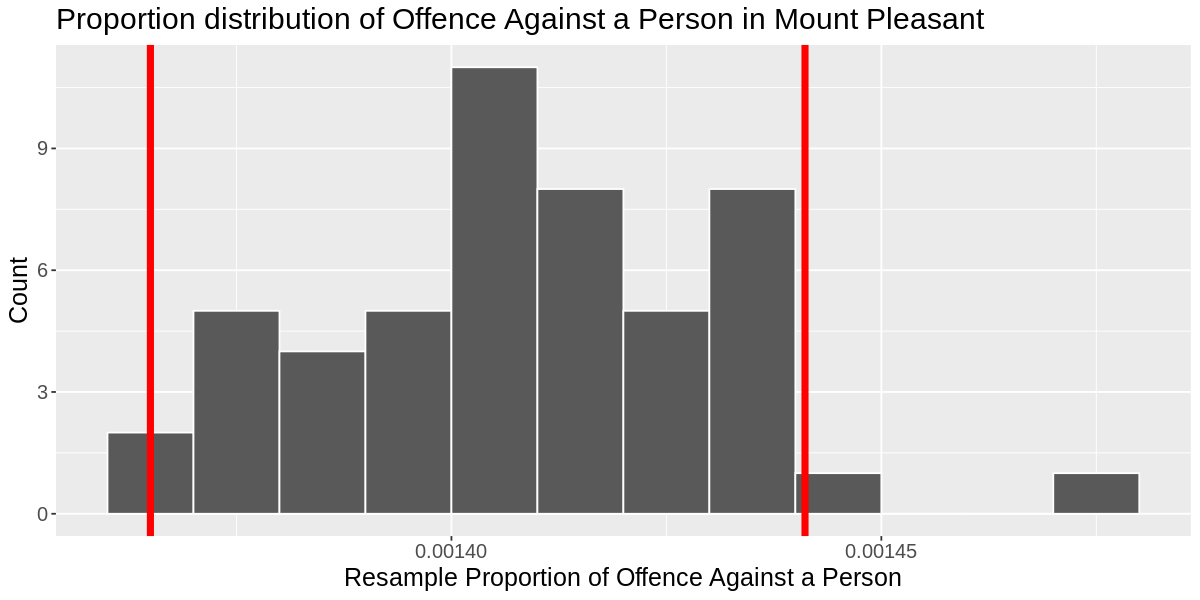

In [61]:
set.seed(1)

# Plotting the proportion differences for the offence against a person in the two neighbourhoods
options(repr.plot.width = 10, repr.plot.height = 5)
mount_pleasant_sample_prop_plot_offence <- mount_pleasant_sample_offence_prop %>%
      ggplot(aes(x = prop)) +
      geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
      ggtitle("Proportion distribution of Offence Against a Person in Mount Pleasant") +
      geom_vline(xintercept = mount_pleasant_offence_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = mount_pleasant_offence_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
      labs(x = "Resample Proportion of Offence Against a Person", y="Count")

strathcona_sample_prop_plot_offence <- strathcona_sample_offence_prop %>%
    ggplot(aes(x = prop)) +
  geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
    ggtitle("Proportion distribution of Offence Against a Person in Strathcona") +
      geom_vline(xintercept = strathcona_offence_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = strathcona_offence_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
  labs(x = "Resample Proportion of Offence Against a Person", y="Count")


mount_pleasant_sample_prop_plot_offence

*Plot 7: Proportion distribution of Offence Against a person in Mount Pleasant*

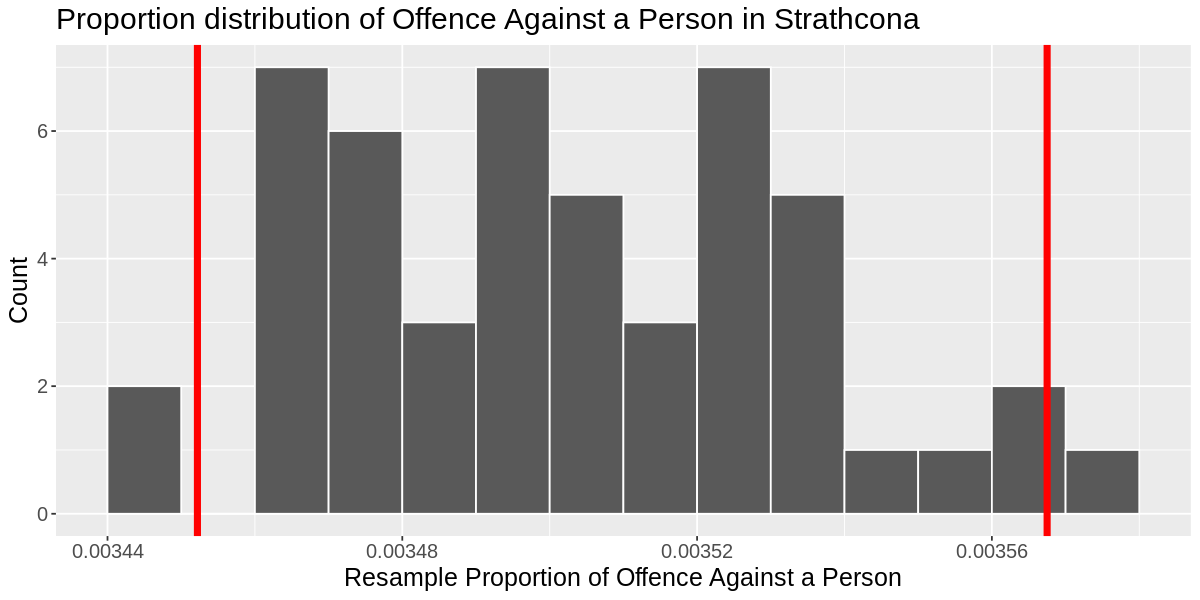

In [62]:
strathcona_sample_prop_plot_offence

*Plot 8: Proportion distribution of Offence Against a person in Strathcona*

## Bootstrapping

In [ ]:
# calculate difference in proportion for theft from vehicle and offence against a person using bootstrap
set.seed(1)
theft_diff_prop_boot <- crime_theft %>% 
    specify(formula = is_theft ~ NEIGHBOURHOOD, success = "TRUE") %>%
    hypothesise(null = 'independence') %>%
    generate(reps = 100, type = 'bootstrap') %>%
    calculate(stat = 'diff in props', order = c("Mount Pleasant", "Strathcona"))
    
offence_diff_prop_boot <- crime_offence %>% 
    specify(formula = is_theft ~ NEIGHBOURHOOD, success = "TRUE") %>%
    hypothesise(null = 'independence') %>%
    generate(reps = 100, type = 'bootstrap') %>%
    calculate(stat = 'diff in props', order = c("Strathcona", "Mount Pleasant"))

head(theft_diff_prop_boot)

*Table 23: Difference in bootstrap for Theft from Vehicle type*

In [ ]:
head(offence_diff_prop_boot)

*Table 24: Difference in bootstrap for Offence against a person type*

In [ ]:
# get confidence interval using bootstrap
set.seed(1)
theft_boot_ci <- theft_diff_prop_boot %>%
    get_ci(level = 0.95, type = 'percentile')  # Setting the Confidence interval = 95%

offence_boot_ci <- offence_diff_prop_boot %>%
    get_ci(level = 0.95, type = 'percentile') # Setting the Confidence interval = 95%

theft_boot_ci

*Table 25: Bootstrap Confidence Interval for Theft from a vehicle* 

In [ ]:
offence_boot_ci

*Table 26: Bootstrap Confidence Interval for Offence Against a person* 

In [ ]:
# visualize the difference in proportion distribution using bootstrap
set.seed(1)

options(repr.plot.width = 8, repr.plot.height = 5)
theft_diff_prop_plot_boot <- theft_diff_prop_boot %>%
    visualise() +
    shade_confidence_interval(endpoints = theft_boot_ci) +
    labs(x='Difference in Proportion Distribution (Theft from Vehicle)', y='Count') +
    ggtitle("Proportion distribution of Theft from Vehicle")  +
    theme(text=element_text(size=15))

offence_diff_prop_plot_boot <- offence_diff_prop_boot %>%
    visualise() +
    shade_confidence_interval(endpoints = offence_boot_ci) +
    labs(x='Difference in Proportion Distribution (Offence Against a Person)', y='Count') +
    ggtitle("Proportion distribution of Offence Against a Person")  +
    theme(text=element_text(size=15))

theft_diff_prop_plot_boot

*Plot 9: Proportion Distribution for Theft from a vehicle* 

In [ ]:
offence_diff_prop_plot_boot

*Plot 10: Proportion Distribution for Offence against a person* 

The plot indicates that the confidence interval did not include 0, suggesting that we should reject the null hypothesis and conclude that there is a difference between Mount Pleasant and Strathcona in the 'theft from vehicle' crime type.

## Permutation

In [ ]:
# calculate difference in proportion for theft from vehicle and offence against a person using permutation
set.seed(1)
theft_diff_prop_permute <- crime_theft %>% 
    specify(formula = is_theft ~ NEIGHBOURHOOD, success = "TRUE") %>%
    hypothesise(null = 'independence') %>%
    generate(reps = 100, type = 'permute') %>%
    calculate(stat = 'diff in props', order = c("Mount Pleasant", "Strathcona"))
    
offence_diff_prop_permute <- crime_offence %>% 
    specify(formula = is_theft ~ NEIGHBOURHOOD, success = "TRUE") %>%
    hypothesise(null = 'independence') %>%
    generate(reps = 100, type = 'permute') %>%
    calculate(stat = 'diff in props', order = c("Strathcona", "Mount Pleasant"))

head(theft_diff_prop_permute)

*Table 27: Difference in Permutation for Theft from Vehicle type*

In [ ]:
head(offence_diff_prop_permute)

*Table 28: Difference in Permutation for Offence Against a person*

In [ ]:
# get confidence interval using permutation
set.seed(1)
theft_permute_ci <- theft_diff_prop_permute %>%
    get_ci(level = 0.95, type = 'percentile') # Setting the Confidence interval = 95%

offence_permute_ci <- offence_diff_prop_permute %>%
    get_ci(level = 0.95, type = 'percentile') # Setting the Confidence interval = 95%

theft_permute_ci

*Table 29: Permutation Confidence Interval for Theft from a vehicle*

In [ ]:
offence_permute_ci

*Table 30: Permutation Confidence Interval for Offence Against a person*

In [ ]:
# visualize the difference in proportion distribution using permutation
set.seed(1)

options(repr.plot.width = 8, repr.plot.height = 5)
theft_diff_prop_plot <- theft_diff_prop_permute %>%
    visualise() +
    shade_confidence_interval(endpoints = theft_permute_ci) +
    labs(x='Difference in Proportion Distribution (Theft from Vehicle)', y='Count') +
    ggtitle("Proportion distribution of Theft from Vehicle")  +
    theme(text=element_text(size=15))

offence_diff_prop_plot <- offence_diff_prop_permute %>%
    visualise() +
    shade_confidence_interval(endpoints = offence_permute_ci) +
    labs(x='Difference in Proportion Distribution (Offence Against a Person)', y='Count') +
    ggtitle("Proportion distribution of Offence Against a Person")  +
    theme(text=element_text(size=15))

theft_diff_prop_plot

*Plot 11: Proportion Distribution for Theft from a vehicle*

In [ ]:
offence_diff_prop_plot

*Plot 12: Proportion Distribution for Offence Against a person*

From the plot, it is evident that the interval includes 0. This implies that we will accept the null hypothesis, indicating no significant difference in the proportion of crimes against persons between Mount Pleasant and Strathcona.

### Two sampled Z-test

In [ ]:
set.seed(1)


# Running the t-test model on the both the crime types and neighbourhoods to find the p-values
z_test_result_theft <- tidy(
  prop.test(x = c(dataMP$n[1], dataS$n[1]),
            n = c(proportion$total_number_of_crime[2], proportion$total_number_of_crime[1]),
            correct = FALSE,
            alternative = "greater")
)

z_test_result_offence <- tidy(
  prop.test(x = c(dataMP$n[10], dataS$n[10]),
            n = c(proportion$total_number_of_crime[2], proportion$total_number_of_crime[1]),
            correct = FALSE,
            alternative = "less")
)

z_test_result_theft

*Table 31: Z-test summary for theft from a vehicle*

Upon examining the table, it's evident that our sample mean is quite close to the population mean. Additionally, we have obtained a relatively low p-value, indicating the rejection of the null hypothesis as previously mentioned. Therefore, we accept the alternative hypothesis, which states that Mount Pleasant exhibits a higher proportion of thefts from vehicles compared to Strathcona.

In [ ]:
z_test_result_offence

*Table 32: Z-test summary for Offence against a person*

Based on this table, we could see our sample mean is far off from the true population mean and we obtain a p-value of 1. This indicate we accept the null hypothesis that there's no difference between the proportion of crime against peron in Strathcona and Mount Pleasant.

## Null Distribution for Difference in Proportion

In [ ]:
# Calculate observed difference in Theft from Vehicle and Offence against a person

obs_diff_prop_theft <- crime_theft %>% 
  specify(is_theft ~ NEIGHBOURHOOD, success = "TRUE") %>% 
  calculate(stat = 'diff in props', order = c("Mount Pleasant", "Strathcona"))

obs_diff_prop_offence <- crime_offence %>% 
  specify(is_theft ~ NEIGHBOURHOOD, success = "TRUE") %>% 
  calculate(stat = 'diff in props', order = c("Strathcona", "Mount Pleasant"))


obs_diff_stat <- rbind(obs_diff_prop_theft, obs_diff_prop_offence) %>%
    mutate(crime_type = c("Theft from Vehicle", "Offence Against a Person"))

obs_diff_stat

*Table 33: The observed difference bwteen the stats for the two crime types*

In [ ]:
# Visualize the null distribution of theft from vehicle with p-value using bootstrap
options(repr.plot.width = 8, repr.plot.height = 6)
set.seed(1)
theft_null_dist_boot <- theft_diff_prop_boot %>%
    visualize() +
    shade_p_value(obs_stat = obs_diff_prop_theft, direction = 'right') +
    labs(x='Difference in Proportion between Mount Pleasant & Strathcona (Theft from Vehhicle)', y='Count') +
    ggtitle('Null Distribution using Bootstrap (Theft from Vehicle)') +
    theme(text=element_text(size=15))

offence_null_dist_boot <- offence_diff_prop_boot %>%
    visualize() +
    shade_p_value(obs_stat = obs_diff_prop_offence, direction = 'left') +
    labs(x='Difference in Proportion between Mount Pleasant & Strathcona (Offence Against a Person)', y='Count') +
    ggtitle('Null Distribution using Bootstrap(Offence Against a Person)') +
    theme(text=element_text(size=15))

theft_null_dist_boot

*Plot 13 : Bootstrap Null Distribution (Theft from Vehicle)*

In [ ]:
# null distribution and p-value for offence against a person for bootstrap
offence_null_dist_boot

*Plot 14 : Bootstrap Null Distribution (Offence Against a Person)*

In [ ]:
# Visualize the null distribution of theft from vehicle with p-value using permutation
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(1)
theft_null_dist_permute <- theft_diff_prop_permute %>%
    visualize() +
    shade_p_value(obs_stat = obs_diff_prop_theft, direction = 'right') +
    labs(x='Difference in Proportion between Mount Pleasant & Strathcona (Theft from Vehhicle)', y='Count') +
    ggtitle('Null Distribution using Permutation (Theft from Vehicle)') +
    theme(text=element_text(size=15))

offence_null_dist_permute <- offence_diff_prop_permute %>%
    visualize() +
    shade_p_value(obs_stat = obs_diff_prop_offence, direction = 'left') +
    labs(x='Difference in Proportion between Mount Pleasant & Strathcona (Offence Against a Person)', y='Count') +
    ggtitle('Null Distribution using Permutation (Offence Against a Person)') +
    theme(text=element_text(size=15))



*Plot 15 : Permutation Null Distribution (Theft from Vehicle)*

In [ ]:
# Visualize the null distribution of offence against a person with p-value using permutation
offence_null_dist_permute

*Plot 15 : Permutation Null Distribution (Offence Against a Person)*

In [ ]:
# Check p-value for bootstrap

theft_boot_pvalue <- theft_diff_prop_boot %>%
    get_p_value(obs_stat = obs_diff_prop_theft, direction = 'greater')

offence_boot_pvalue <- offence_diff_prop_boot %>%
    get_p_value(obs_stat = obs_diff_prop_offence, direction = 'greater')

boot_p_value <- rbind(theft_boot_pvalue, offence_boot_pvalue) %>%
    mutate(crime_type = c("Theft from Vehicle", "Offence Against a Person"))

boot_p_value

*Table 34: P-Values using bootstrap*

In [ ]:
# Check p-value permutation

theft_permute_pvalue <- theft_diff_prop_permute %>%
    get_p_value(obs_stat = obs_diff_prop_theft, direction = 'greater')

offence_permute_pvalue <- offence_diff_prop_permute %>%
    get_p_value(obs_stat = obs_diff_prop_offence, direction = 'less')

permute_p_value <- rbind(theft_permute_pvalue, offence_permute_pvalue) %>%
    mutate(crime_type = c("Theft from Vehicle", "Offence Against a Person"))

permute_p_value

*Table 35: P-values using permutation*

### Important Note

- The p-value is equals to 0 and 1 respectively, for permutation model. This implies that the p-value is out of the bounds of the graph and there is some issue with our original dataset.

- We are only taking 100 bootstrap samples as we are limited by the computional power of our resources

- We do not have the Population Standard deviation as the data we are working with is a sample and not the entire population. However, we assumed the standard deviation we have is the true population standard deviation to proceed with our calculation.

#### Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.

In this case, both the methods should be similar in terms of results for categorical data, however, given that we do not have an accurate p-value which is out of bound of the graph, bootstrap is better in terms of estimating sampling distribution and conducting confidence interval in our case. This is because for bootstrap, all of the underlying assumptions are satisfied in this case as we have large sample size, and it's representative of the population. 

The different results can be attributed to the flaws in the dataset as the two methods should yield similar results. But since that's not the case with our model, there are some unnoticed underlying errors in the dataset which makes our model return unuasal results. 

# Discussion

### Summarize what you found, and the implications/impact of your findings.

Based on the p-value we have obtained, we can conclude that the difference in the proportion of theft in vehicle crime between Mount Pleasant and Strathcona is greater in Mount Pleasant. This conclusion is supported by the significantly small p-value we obtained, leading us to reject the null hypothesis. This suggests that the high crime rate in Mount Pleasant can be attributed to the substantial contribution of theft from vehicles. In contrast, for Strathcona, theft from vehicles does not appear to be the primary contributor to its high crime rate.

Turning to the second hypothesis test, we can conclude that there is no significant difference in the proportion of crime against persons between Mount Pleasant and Strathcona. This conclusion is based on the large p-value we obtained, leading us to accept the null hypothesis. This indicates that crime against persons is not the main factor contributing to the high crime rates observed in both Mount Pleasant and Strathcona. Although, there might be a limitation with the dataset as we are getting a p-value of 1 which calls for more tests to be performed to justify this conclusion.

The results imply that law enforcement could consider focusing on addressing theft from vehicle crimes more attentively. One potential approach could involve increasing fines and penalties to deter such crimes and subsequently reduce overall crime rates associated with theft from vehicles.

### If relevant, discuss whether your results were what you expected to find.

Considering the low p-value in case 1 where we are studying the difference in proportion for theft from vehicles in the two neighbourhood, we can easily reject the null hypothesis as the significant value is greater than the p-value. This is exactly in line with our preliminary results and further fortifies are conclusion.

However, in case 2 where we are studying the offence against a person crime type, the p-value is much higher than the significant value as well as contradictory (0 and 1) which makes it difficult for us to rejct the null hypothesis. This is not as per our initial findings where we predicted that the offence against a person will be much higher in Strathacona than Mount Pleasant. However, it is worth noting that as mentioned before, there might be some un-noticed flaws in the dataset that makes performing accurate analysis highly difficult and unreliable. Further studies are required for an accurate inference and it is beyond the capacity of this study.

### Discuss future questions/research this study could lead to.

Finally, we're being careful to get the trend of crime until 2023. After the COVID-19, our economy became more and more stable this year. Since our economy is becoming stable, the crime rate would also be more constant and consistant, and since  we are not using floating data for our study,our data may not be fully representative. 
We get the crime rates of Strathconat and Mount Pleasantin until the end of 2023. In 2024, the data will change and the result of our study might change as well. VPD will have to carefully analyse more relevant data and try to update their policies based on that.[5]

# Reference

* [1] Vancouver Police Department's Open Crime Data https://geodash.vpd.ca/opendata/
* [2] Andresen, M.A., & Brantingham, P.J. (2007). Hot spots of crime in Vancouver and their relationship with population characteristics. Ottawa, ON: Department of Justice Canada.
* [3] Andresen, M. A. (2012). Unemployment and crime: A neighborhood level panel data approach. Social science research, 41(6), 1615-1628.
* [4] Norrie, A. W., & Cambridge Core EBA eBooks Complete Collection. (2014). Crime, reason and history: A critical introduction to criminal law (Third ed.). Cambridge University Press. https://doi.org/10.1017/CBO9781139031851
* [5] Shaughnessy Neighborhood Social Indicators Profile 2020. City of Vancouver. (2020). https://vancouver.ca/files/cov/social-indicators-profile-shaughnessy.pdf